In [47]:
#loading imports
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
#from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

ImportError: cannot import name 'np_utils' from 'keras.utils' (C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\__init__.py)

In [13]:
#set the color channl
K.image_data_format()

'channels_last'

In [14]:
#set seed
np.random.seed(0)

In [17]:
#set image information
channels = 1
height = 28
width = 28

Load the MNIST data set

In [20]:
#load data and target from mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels.

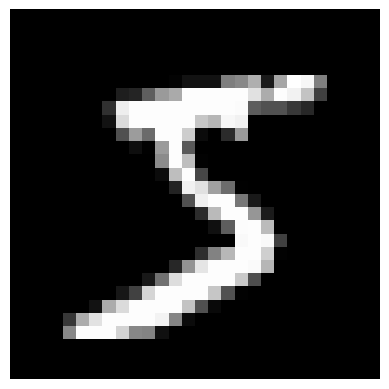

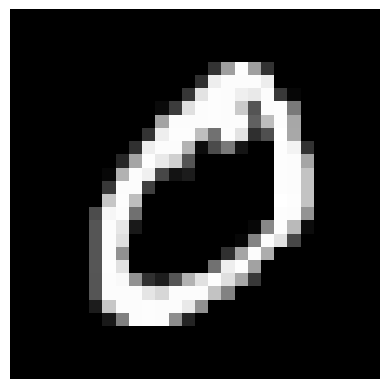

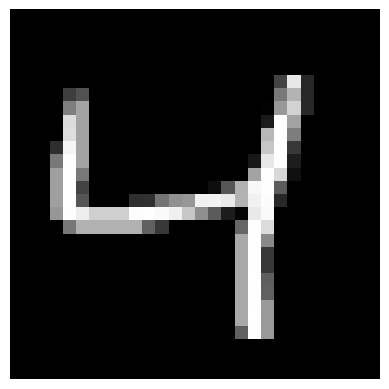

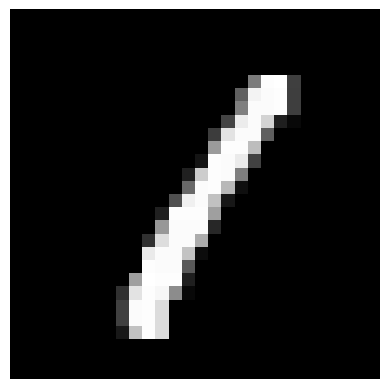

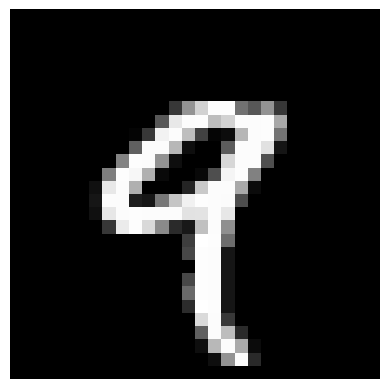

In [23]:
for i in range(5):
    plt.imshow(train_images[i], cmap='gray'), plt.axis("off")
    plt.show()

In [24]:
#print first five labels of the training set
print(train_labels[:5])

[5 0 4 1 9]


Build and train a Keras CNN classifier on the MNIST training set.

In [39]:
#reshaping training image into features
data_train = train_images.reshape(train_images.shape[0], channels, height, width)

In [41]:
#reshape test image data into features
data_test = test_images.reshape(test_images.shape[0], channels, height, width)

In [44]:
#rescale pixel intensity
features_train = data_train/255
features_test = data_test/255

In [46]:
#one hot encode target
target_train = np_utils.to_categorical(train_labels)
target_test = np_utils.to_categorical(test_labels)
number_of_classes = target_test.shape[1]

NameError: name 'np_utils' is not defined

In [33]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

In [35]:
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [36]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [37]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5


ValueError: in user code:

    File "C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10, 2) and (None, 10) are incompatible


Report the test accuracy of your model.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Display a confusion matrix on the test set classifications.

In [ ]:
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)
confusion = confusion_matrix(np.argmax(test_labels, axis=1), predictions)
print(confusion)

Summarize your results.